In [1]:
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings 
filterwarnings("ignore")

## Loading The Image

In [23]:
path = "Images/test_image.jpg"
img = cv2.imread(path)

In [24]:
def display(image):
    
    plt.figure(figsize = (15,5))
    plt.imshow(image, cmap = "gray")
    plt.title(f"Shape : {image.shape}")
    plt.show()

In [25]:
def count_pixels(image):
    
    plt.figure(figsize = (40,10))
    sns.countplot(image.ravel())
    plt.title("Pixels Counts", fontsize = 15)
    plt.xticks(rotation = 90)
    plt.show()

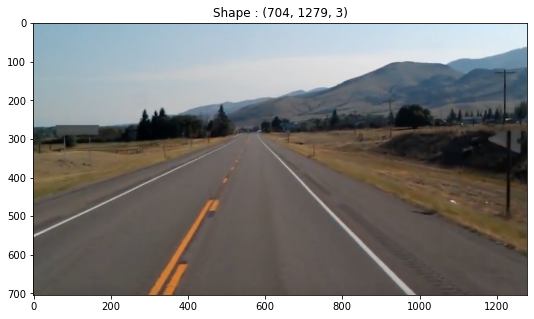

In [26]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(img)

## Convert Gray

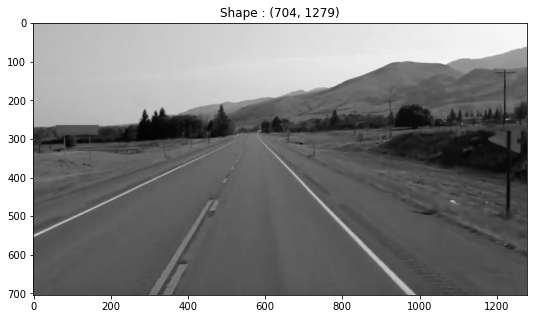

In [27]:
gray_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

display(gray_img)

In [28]:
gray_img.max(),gray_img.min(),img.max(),img.min()

(246, 0, 254, 0)

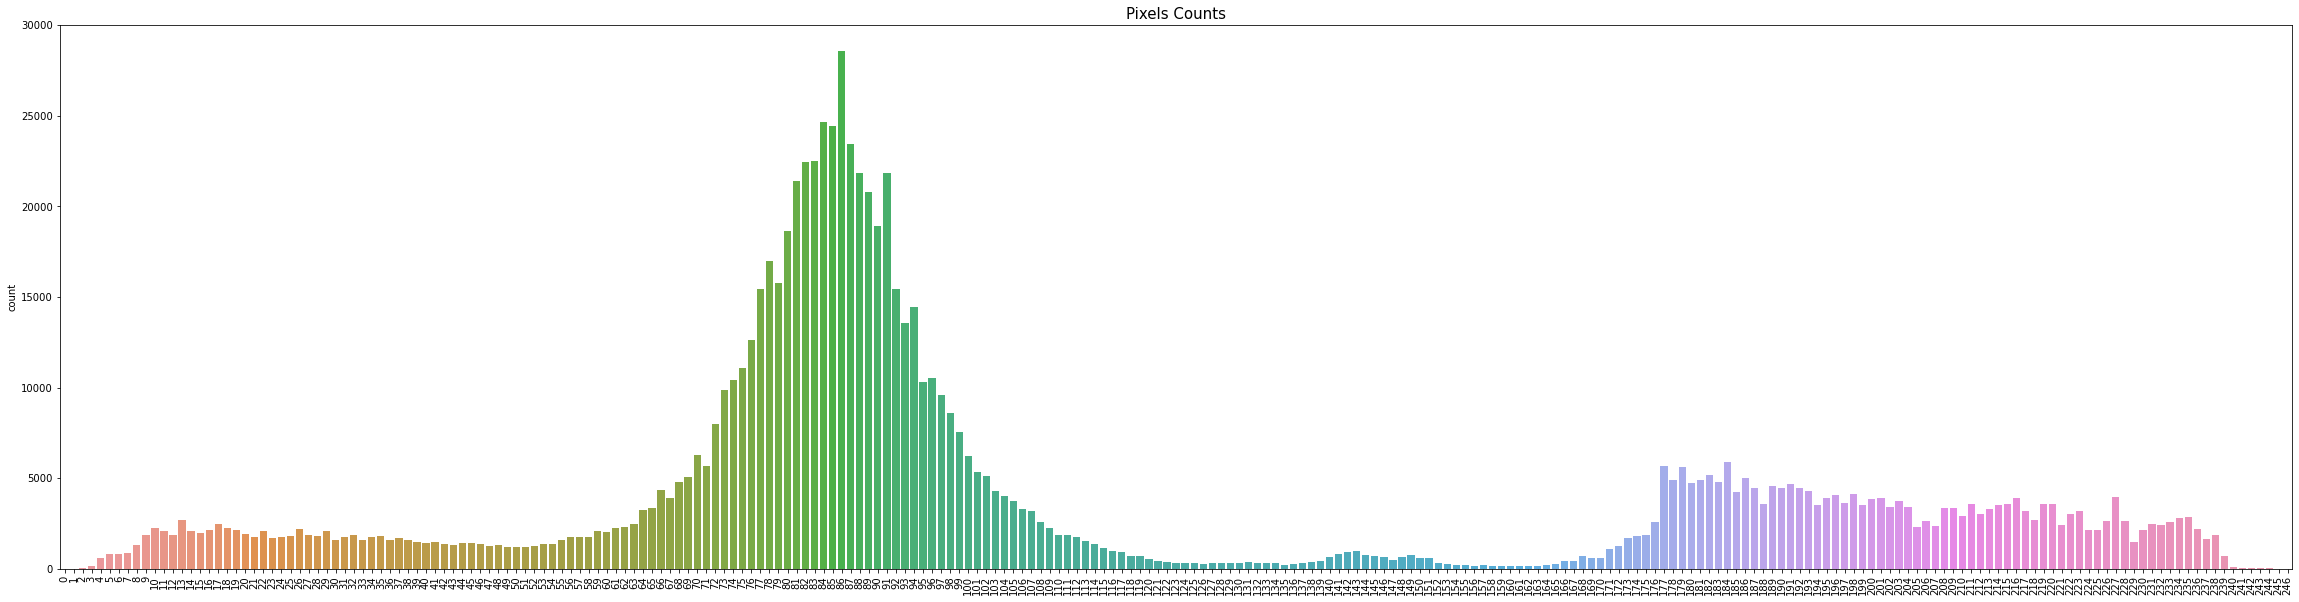

In [29]:
count_pixels(gray_img)

## Smoothening Image

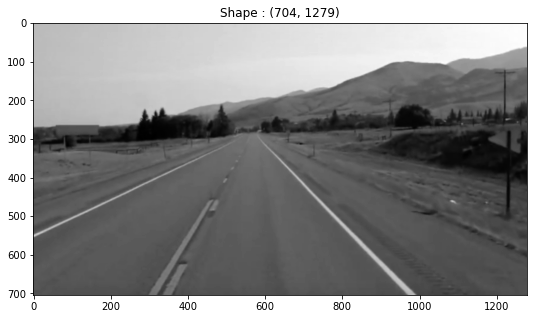

In [30]:
blur_img = cv2.GaussianBlur(gray_img, ksize = (5,5), sigmaX = 0)
display(blur_img)

In [31]:
gray_img.max(),gray_img.min(),img.max(),img.min(),blur_img.max(),blur_img.min()

(246, 0, 254, 0, 241, 3)

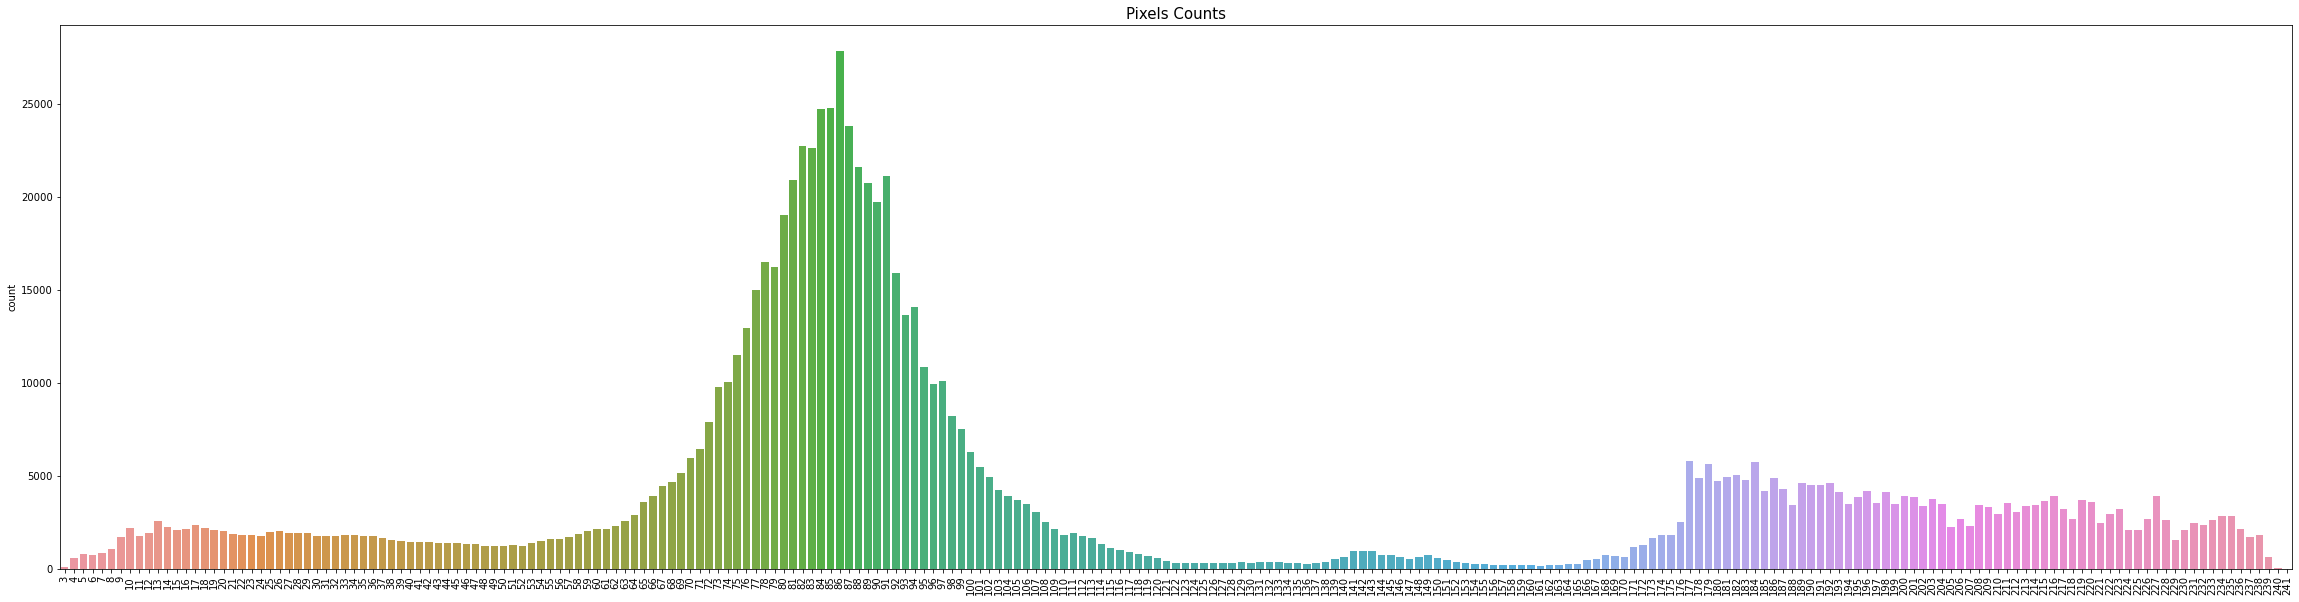

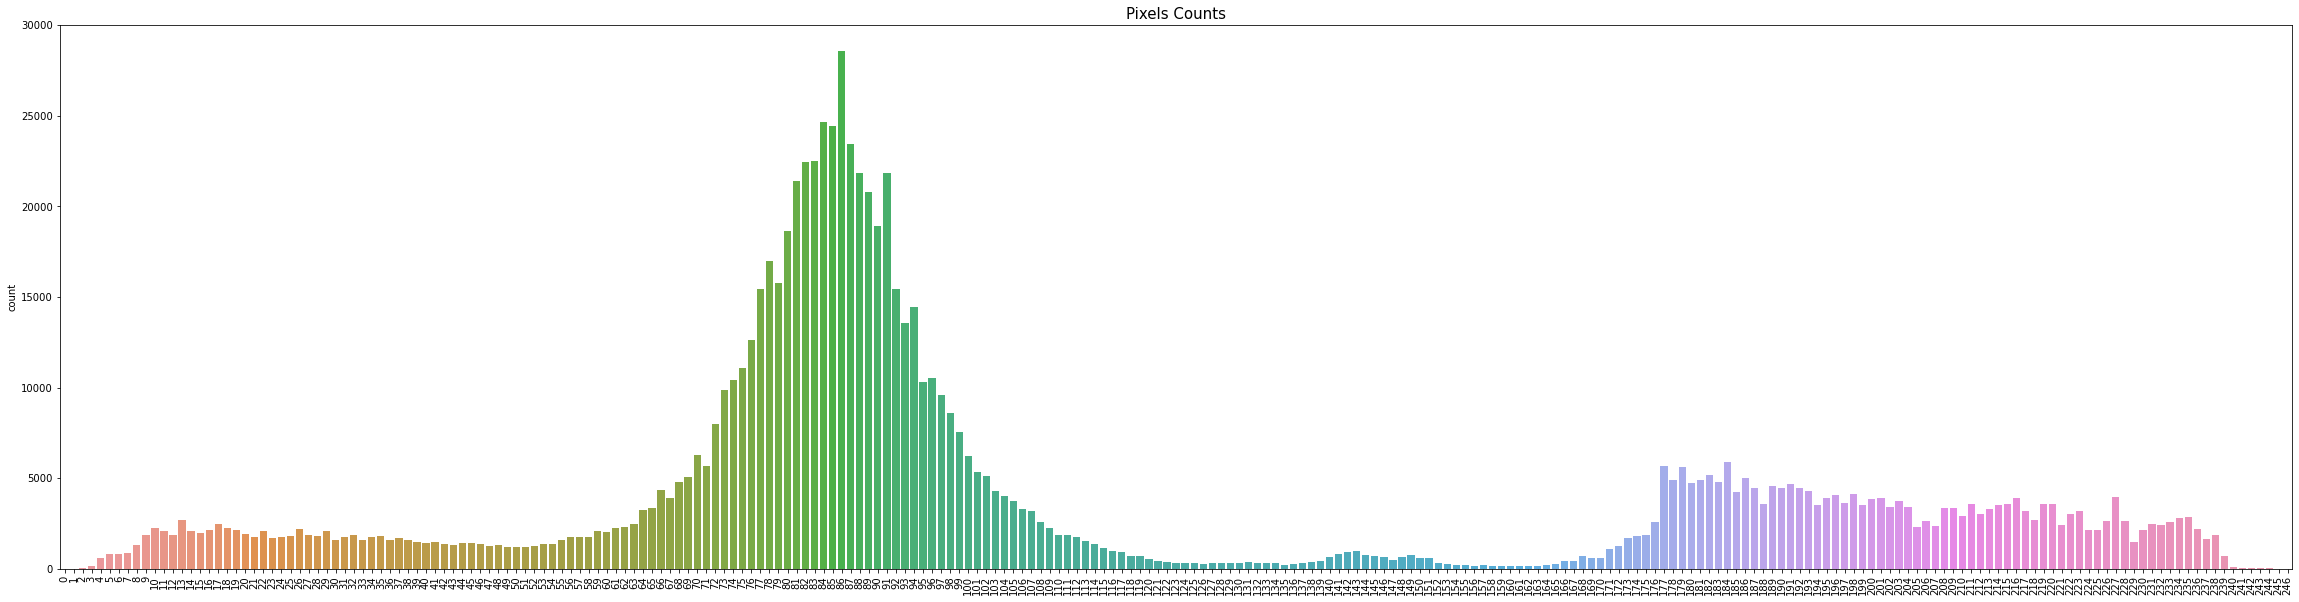

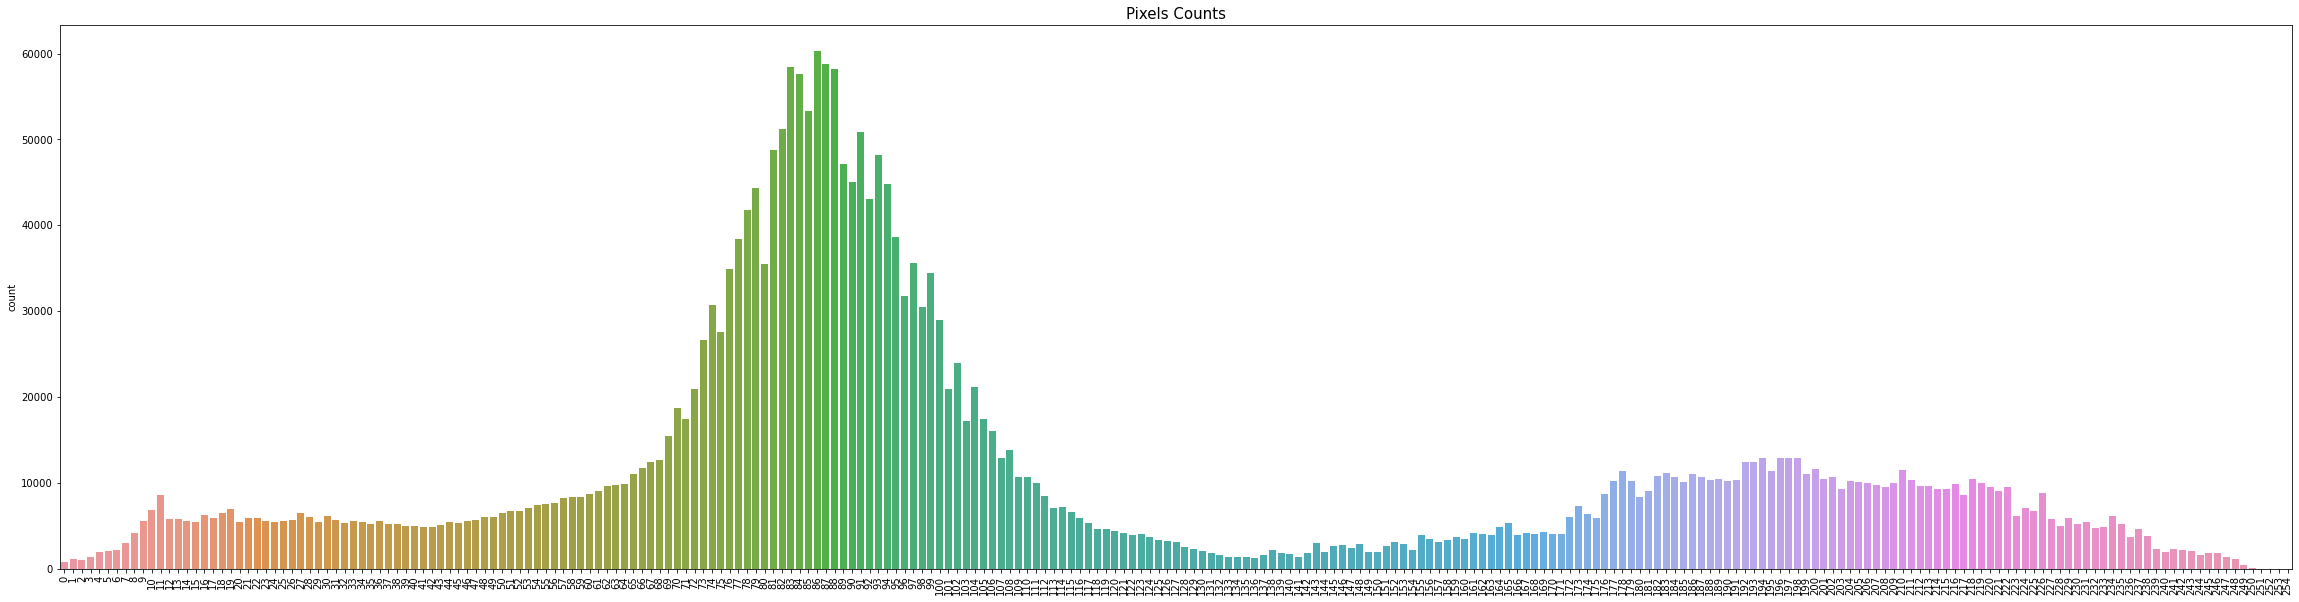

In [32]:
count_pixels(blur_img)
count_pixels(gray_img)
count_pixels(img)

## Simple Edge Detection

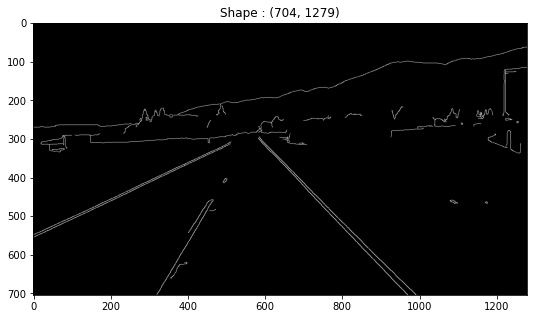

In [33]:
canny_img = cv2.Canny(blur_img, 50,150)
display(canny_img)

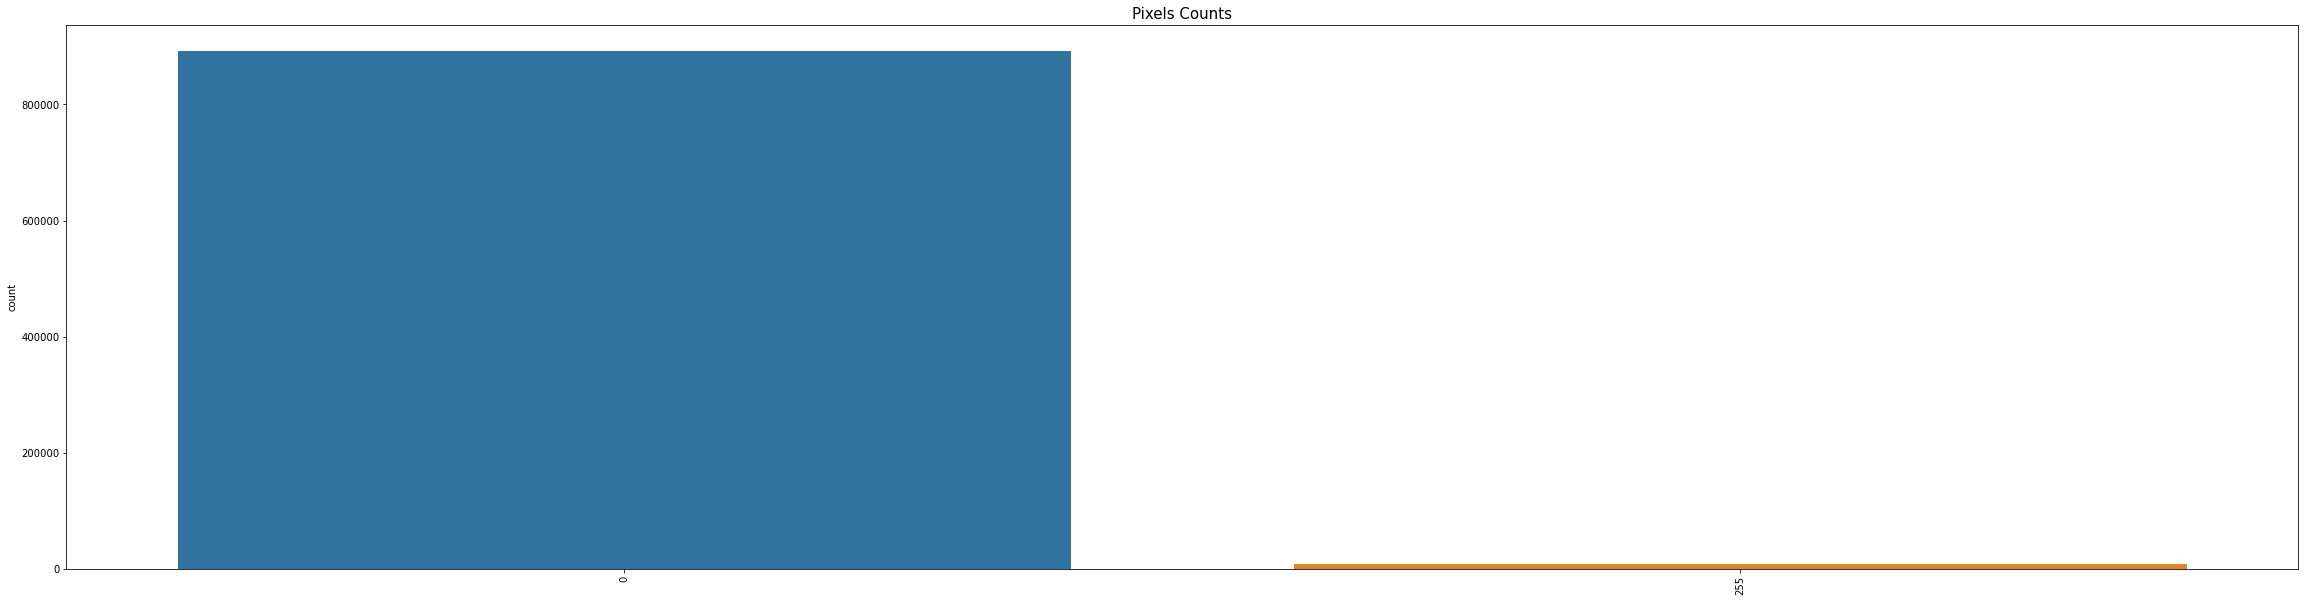

In [34]:
count_pixels(canny_img)

## Region Of Interest (ROI)

In [35]:
path = "Images/test_image.jpg"
image = cv2.imread(path)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RBG)

def canny_conv(image):
    
    gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    blur_img = cv2.GaussianBlur(gray_img,ksize = (5,5),sigmaX = 0)
    canny_img = cv2.Canny(blur_img, 50 , 150)
    
    return canny_img

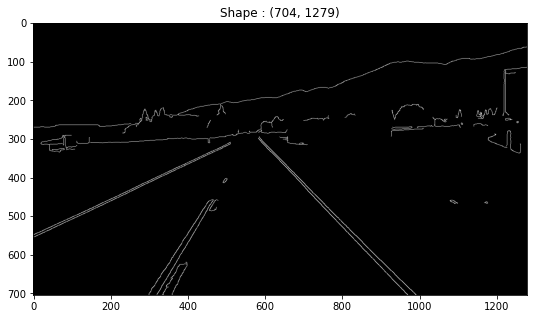

In [36]:
canny_img = canny_conv(image)

display(canny_img)

In [37]:
def region_of_interest(image):
    
    height = image.shape[0]
    
    triangle = np.array([[(200,height),(1100,height),(550,250)]])
    
    mask = np.zeros_like(image)
    
    cv2.fillPoly(mask, triangle,(255,255,255))
    
    return mask

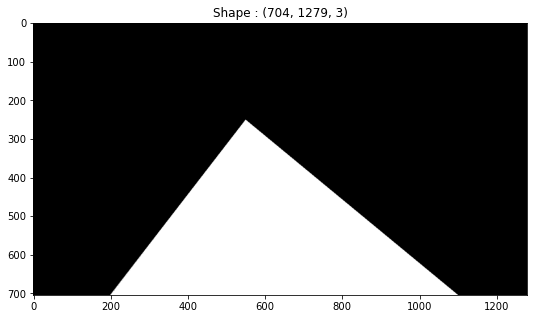

In [38]:
roi = region_of_interest(img)
display(roi)

## Bitwise_And

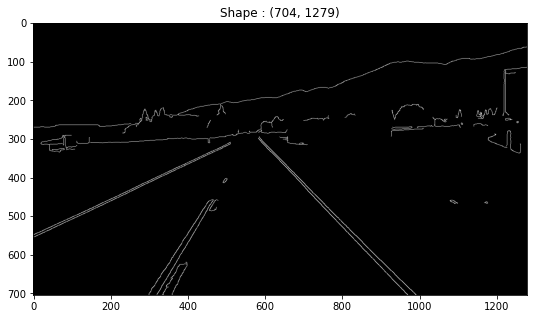

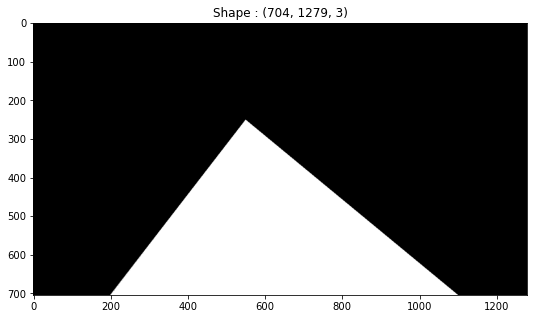

In [42]:
display(canny_img)
display(roi)

In [44]:
# Extra Kod Eklendi !!

def region_of_interest(image):
    
    height = image.shape[0]
    
    triangle = np.array([[(200,height),(1100,height),(550,250)]])
    
    mask = np.zeros_like(image)
    
    cv2.fillPoly(mask, triangle, (255,255,255))
    
    masked_image = cv2.bitwise_and(image, mask)

    return masked_image

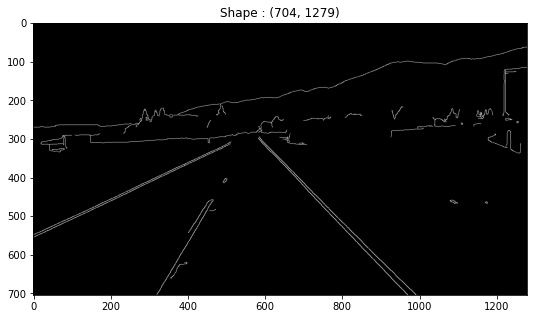

In [45]:
# Mask Çıktısına bak !!! (roi)
# Dağlık alanlarda yani yukardaki kısımlarda mask değeri 0 olduğu için her türlü yutucak
# Ama yolu belirlenmiş olduğumuz üçgende orası ne gelirse gelsin aynı o bölge olarak kalıcak
# Ne geliyorsa canny değerinde beyaz üçgen kısmı öyle kalıcak

# Üçgen içindeki değerlerden bir örnek olsun
# Örnek1 : 1111 Bu mask
# Örnek2 : 1100 Bu canny
# Sonuç  : 1100 Burda görüyoruz ki canny neyse o çıkıyor bu beyaz yani 1111 mask için 

# mask : 0000 - Canny : 1100 >> result : 0000 Buda siyah olan kısımlar için !!!

canny = canny_conv(img)
display(canny)

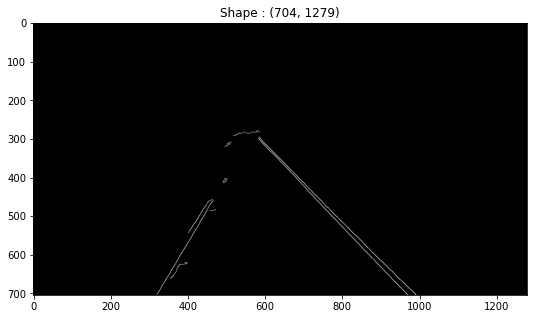

In [47]:
cropped_img = region_of_interest(canny)
display(cropped_img)

## Hough_Transform- Line_Detection

In [48]:
np.pi / 180

0.017453292519943295

In [56]:
# https://answers.opencv.org/question/2966/how-do-the-rho-and-theta-values-work-in-houghlines/

lines = cv2.HoughLinesP(image = cropped_img, rho = 2, theta = np.pi / 180, threshold = 100,lines = np.array([]),
                       minLineLength = 40, maxLineGap = 5)

type(lines),lines.shape,len(lines),lines.shape

(numpy.ndarray, (13, 1, 4), 13, (13, 1, 4))

In [54]:
def display_lines(image, lines):
    
    line_image = np.zeros_like(image)
    
    if lines is not None:
        
        for line in lines:
            #print(line)
            line = line.reshape(4)
            #print(line)
            x1,y1,x2,y2 = line
            cv2.line(line_image,(x1,y1),(x2,y2),(0,0,255),10)
            
    return line_image

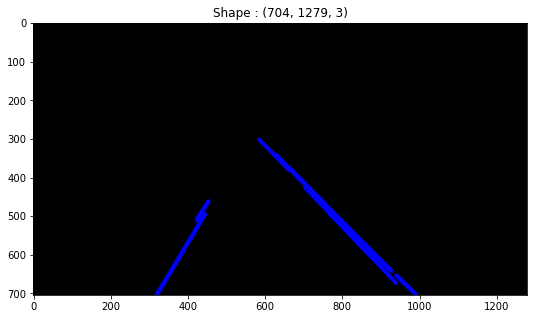

In [57]:
lines_img = display_lines(img,lines)
display(lines_img)

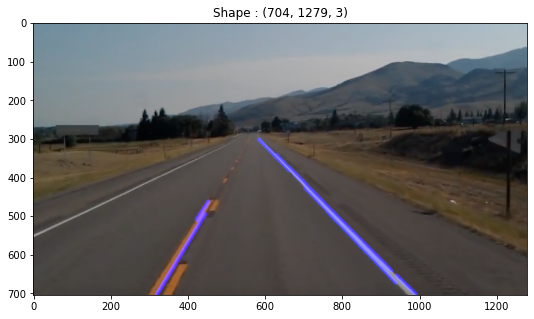

In [58]:
combo_img = cv2.addWeighted(img, 0.8, lines_img , 1, 1)
display(combo_img)

## Optimizing

In [61]:
deneme = [(1.000000000000002, -287.00000000000153), (1.0392156862745074, -306.2941176470568)]
deneme = np.array(deneme)

np.average(deneme,axis = 0)

array([   1.01960784, -296.64705882])

In [63]:
(1.000000000000002 + 1.0392156862745074) / 2, (-287.00000000000153 + -306.2941176470568) / 2

(1.0196078431372548, -296.64705882352916)

In [64]:
np.average(deneme,axis = 1)

array([-143.        , -152.62745098])

In [65]:
(-287.00000000000153 + 1.000000000000002) / 2,  (1.0392156862745074 + -306.2941176470568) / 2

(-143.00000000000077, -152.62745098039113)

In [80]:
# Burda şimdi y ekseni aşağı doğru giderken artarken
# Yukarı doğru çıkarken azalıyor
# Bildiğimiz slope hesaplama yanı fakat
# Left_Fit Azalıyorken
# Right_Fit Artıyor!! 
# Ayrıma dikkat et !!!

def average_slope_intercept(image,lines):
    
    left_fit = []
    right_fit = []
    
    if lines is None:
        return None
    
    for line in lines:
        
        #print(lines)
        line = line.reshape(4)
        #print(line)
        x1,y1,x2,y2 = line
        parameters = np.polyfit((x1,x2),(y1,y2),1)
        #print(parameters)
        
        slope = parameters[0]
        intercept = parameters[1]
        
        if slope < 0:
            left_fit.append((slope,intercept))
            
        else:
            
            right_fit.append((slope,intercept))
            
    #print(right_fit)
    #print()
    #print(left_fit)
    
    if len(left_fit) and len(right_fit):
        
        # Burda Sağ ve Soldaki değerlerin ortalama slope ile intercept yakalıyoruz !!
        
        left_fit_average = np.average(left_fit, axis = 0)
        right_fit_average = np.average(right_fit, axis = 0)        
        
        #print(left_fit_average)
        #print(right_fit_average)
        
        left_line = make_coordinates(image, left_fit_average)
        right_line = make_coordinates(image, right_fit_average)
        
        return np.array([left_line, right_line])
    
def make_coordinates(image, line_parameters):
    
    slope, intercept = line_parameters
    #print(image.shape)
    y1 = image.shape[0]
    y2 = int(y1 * (3/5))
    
    x1 = int((y1 - intercept) / slope)
    x2 = int((y2 - intercept) / slope)
    
    return np.array([x1,y1,x2,y2])

In [81]:
average_slope_intercept(img, lines)

array([[308, 704, 483, 422],
       [978, 704, 703, 422]])

In [82]:
averaged_lines = average_slope_intercept(img, lines)
averaged_lines

array([[308, 704, 483, 422],
       [978, 704, 703, 422]])

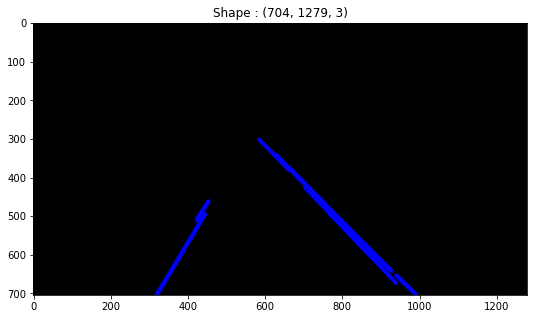

In [84]:
display(lines_img)

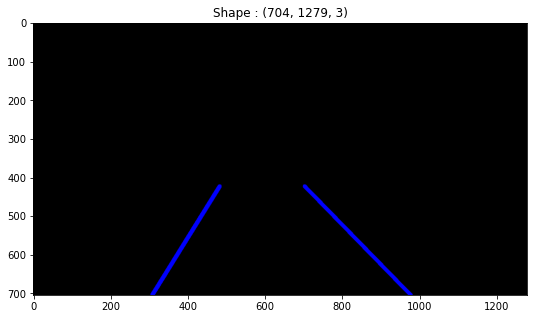

In [86]:
last_lines_img = display_lines(image,averaged_lines)
display(last_lines_img)

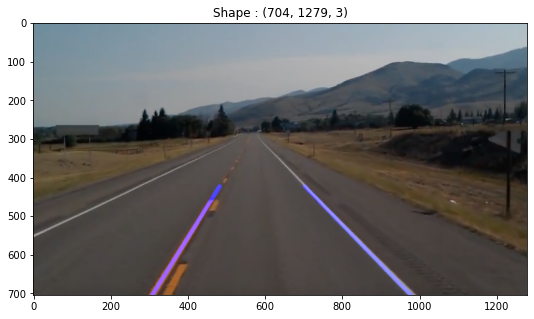

In [88]:
last_combo_img = cv2.addWeighted(img,0.8,last_lines_img,1,1)
display(last_combo_img)

## Summary

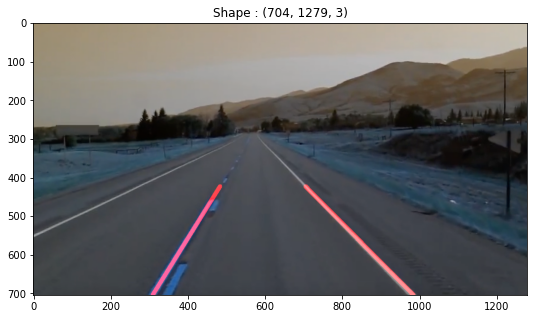

In [100]:
# Step 1:

path = "Images/test_image.jpg"
image = cv2.imread(path)

def canny_conv(image):
    
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur_img = cv2.GaussianBlur(gray_img, ksize = (5,5), sigmaX = 0)
    canny_img = cv2.Canny(blur_img, 50,150)
    return canny_img

canny = canny_conv(image)

#display(canny)

# Step 2:

def region_of_interest(canny_image):
    
    """
    Canny Image Use
    """
    
    height = canny_image.shape[0]
    
    triangle = np.array([[(200,height),(1100,height), (550,250)]])
    
    mask = np.zeros_like(canny_image)
    
    cv2.fillPoly(mask, triangle, (255,255,255)) 
    
    masked_image = cv2.bitwise_and(canny_image, mask)
    
    return masked_image

cropped = region_of_interest(canny)

#display(cropped)

# Step 3:

# Dikkat Canny Kullanarak "Lines" çizildi Dikkat !!!

lines = cv2.HoughLinesP(cropped, rho = 2, theta = np.pi / 180, threshold = 100, lines= np.array([]),
                       minLineLength = 40, maxLineGap = 5)

def display_lines(image, lines):
    
    line_image = np.zeros_like(image)
    
    if lines is not None:
        
        for line in lines:
            
            line = line.reshape(4)
            x1,y1,x2,y2 = line
            
            cv2.line(line_image, (x1,y1),(x2,y2),(255,0,0),10)
            
    return line_image

lines_img = display_lines(image, lines)

#display(lines_img)

#combo = cv2.addWeighted(image, 0.8, lines_img , 1, 1)

#display(combo)

# Step 4:

def average_slope_intercept(image, lines):
    
    
    left_fit = []
    right_fit = []
    
    if lines is None:
        
        return None
    
    for line in lines:
        
        x1,y1,x2,y2 = line.reshape(4)
        parameters = np.polyfit((x1,x2),(y1,y2),1)
        slope = parameters[0]
        intercept = parameters[1]
        
        if slope < 0:
            
            left_fit.append((slope,intercept))
            
        else:
            
            right_fit.append((slope,intercept))
            
            
    if len(left_fit) and len(right_fit):
        
        left_fit_average = np.average(left_fit,axis = 0)
        right_fit_average = np.average(right_fit,axis = 0)
        
        left_line = make_coordinates(image, left_fit_average)
        right_line = make_coordinates(image, right_fit_average)
        
        return np.array([left_line,right_line])
    

def make_coordinates(image, line_parameters):
    
    slope, intercept = line_parameters
    
    y1 = image.shape[0]
    y2 = int(y1 * (3/5))
    
    x1 = int((y1 - intercept) / slope)
    x2 = int((y2 - intercept) / slope)
    
    return np.array([x1,y1,x2,y2])

# Step 5:

image = cv2.imread(path)
canny = canny_conv(image)
cropped = region_of_interest(canny)
lines = cv2.HoughLinesP(cropped, rho = 2, theta = np.pi / 180, threshold = 100, lines = np.array([]),
                        minLineLength = 40, maxLineGap = 5)

averaged_lines = average_slope_intercept(image, lines)
last_line_image = display_lines(image, averaged_lines)
last_combo_image = cv2.addWeighted(image, 0.8, last_line_image, 1, 1)

display(last_combo_image)

## Finding Lanes On Video

In [103]:
video_path = "Images/test2.mp4"
cap = cv2.VideoCapture(video_path)

while (cap.isOpened()):
    
    conn, frame = cap.read()
    
    if conn:
        
        canny = canny_conv(frame)
        cropped = region_of_interest(canny)
        lines = cv2.HoughLinesP(cropped, rho = 2, theta = np.pi / 180, threshold = 100, lines = np.array([]),
                        minLineLength = 40, maxLineGap = 5)
        
        averaged_lines = average_slope_intercept(frame, lines)
        last_line_image = display_lines(frame, averaged_lines)
        last_combo_image = cv2.addWeighted(frame, 0.8, last_line_image, 1, 1)
        cv2.imshow("Tracking",last_combo_image)
        
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
        
    else:
        break

cap.release()
cv2.destroyAllWindows()